In [6]:
#for local
import sys
molgen_path = "../"
if molgen_path not in sys.path:
    sys.path.insert(0, molgen_path)

In [7]:
%load_ext autoreload
%autoreload 2
import math, random, copy, numpy as np
import cProfile
import yaml
from utils import get_class_from_class_path
from node import MolSentenceNode #change after Filter implementation
from generator import MCTS

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
config_path = "config/mcts_helm.yaml"
with open(molgen_path + config_path) as f:
    conf = yaml.safe_load(f)

In [9]:
model_class_path, model_dir, lang_class_path, lang_path = (conf.get(k) for k in ("model_class_path", "model_dir", "lang_class_path", "lang_path"))
lang_class = get_class_from_class_path(lang_class_path)
lang = lang_class.load(molgen_path + lang_path)
model_class = get_class_from_class_path(model_class_path)
model = model_class(lang=lang, model_dir=molgen_path + model_dir)

reward_class_path, reward_conf = (conf.get(k) for k in ("reward_class_path", "reward_conf"))
reward_class = get_class_from_class_path(reward_class_path)
reward = reward_class(**reward_conf)

policy_class_path, policy_conf = (conf.get(k) for k in ("policy_class_path", "policy_conf"))
policy_class = get_class_from_class_path(policy_class_path)
policy = policy_class(**policy_conf)

Search is started.
0- time: 0.00, count_rollouts: 1, reward: -0.336493490307569, mol: PEPTIDE1{R.[dP].K.P.[dQ].Q.F.F.G.L.M.[am]}$$$$
1- time: 0.09, count_rollouts: 2, reward: 0.29188995767128323, mol: PEPTIDE1{W.W.K.R.P.W.W.W.R.P.R.W}$$$$
2- time: 0.17, count_rollouts: 3, reward: -0.6785274469869473, mol: PEPTIDE1{[ac].M.W.D.F.D.D.L.N.F.T.G.M.P.P.A.D.E.D.Y.S.C.L.A.[dM].[am]}$$$$
3- time: 0.28, count_rollouts: 4, reward: -0.2225268145456045, mol: PEPTIDE1{R.A.G.L.L.D.Y}$$$$
4- time: 0.32, count_rollouts: 5, reward: -0.10510043147767609, mol: PEPTIDE1{Y.G.G.F.M.[am]}$$$$
5- time: 0.44, count_rollouts: 7, reward: -0.7332015315645252, mol: PEPTIDE1{F.G.G.F.T.G.A.R.K.S.A.R.K.L.A.C.[am]}$$$$
6- time: 0.52, count_rollouts: 8, reward: -0.1647350814561587, mol: PEPTIDE1{A.A.C}$$$$
7- time: 0.55, count_rollouts: 9, reward: -0.6418726265546227, mol: PEPTIDE1{T.P.R.E.R.R.K.K.K.R.Y}$$$$
8- time: 0.60, count_rollouts: 10, reward: -0.9406200392202674, mol: PEPTIDE1{K.Q.E.D.E.K.E.P.E.I.E.G.D.Y.D.R.N.Q

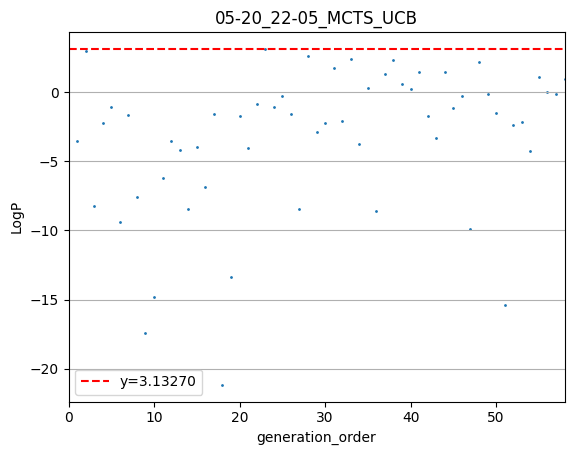

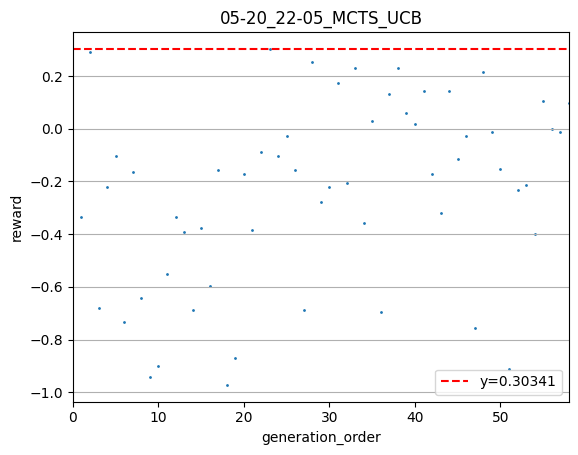

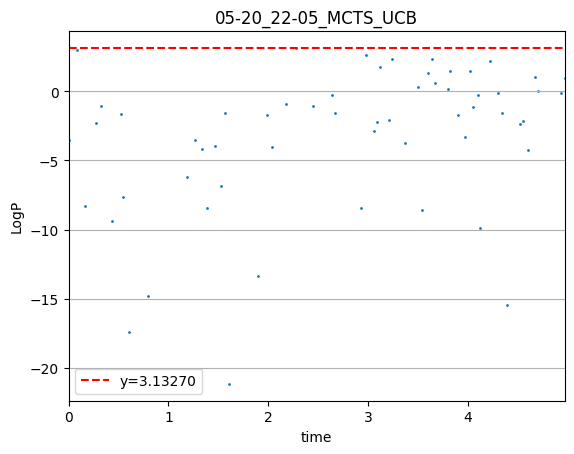

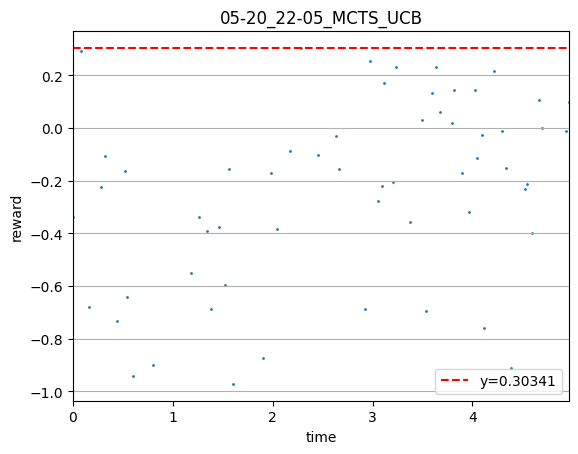

Search is completed.


In [10]:
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*') #invalid mols are already logged

root = MolSentenceNode.bos_node(lang)

output_dir, generation_conf = (conf.get(k) for k in ("output_dir", "generation_conf"))
generator = MCTS(transition=model, reward=reward, policy=policy, output_dir=output_dir)
generator.generate(root=root, **generation_conf)
#cProfile.run("generator.generate(root=root, **generation_conf)"")

In [7]:
#save mcts
save_path = generator.output_dir() + "test.mcts"
generator.save(save_path)

In [ ]:
#load mcts
generator = MCTS.load(save_path, model)